In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(city_df, ride_df, on="city", how="outer")

# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [8]:
city_group = pd.DataFrame(pyber_data)
city_group = city_group.groupby(["type", "city"])

city_fare = round(city_group_df.fare.agg(["count","mean"]),0)
city_fare.columns = ["Number of Rides", "Average Fare per Ride"]

city_fare["% of Total Rides"] = round(city_fare["Number of Rides"] / sum(city_fare["Number of Rides"]) * 100, 2)
city_fare["% of Total Fares"] = round(city_fare["Average Fare per Ride"] / sum(city_fare["Average Fare per Ride"]) * 100, 2)
city_fare.head()

Number of Rides  Average Fare per Ride  \
type  city                                                     
Rural Bradshawfurt                 10                   40.0   
      Garzaport                     3                   24.0   
      Harringtonfort                6                   33.0   
      Jessicaport                   6                   36.0   
      Lake Jamie                    6                   34.0   

                      % of Total Rides  % of Total Fares  
type  city                                                
Rural Bradshawfurt                0.42              1.19  
      Garzaport                   0.13              0.72  
      Harringtonfort              0.25              0.99  
      Jessicaport                 0.25              1.07  
      Lake Jamie                  0.25              1.02

In [12]:
not_city = pd.DataFrame(pyber_data)
not_city = not_city.groupby(["type"])

city_type = round(not_city.fare.agg(["count","sum","mean"]),0)
city_type.columns = ["Total Number of Rides", "Total Revenue of Rides", "Average Fare per Ride"]

city_type["% of Total Rides"] = round(city_type["Total Number of Rides"] / sum(city_type["Total Number of Rides"]) * 100, 2)
city_type["% of Total Fares"] = round(city_type["Total Revenue of Rides"] / sum(city_type["Total Revenue of Rides"]) * 100, 2)
city_type.head()

,Total Number of Rides,Total Revenue of Rides,Average Fare per Ride,% of Total Rides,% of Total Fares
type,,,,,
Rural,125,4328.0,35.0,5.26,6.81
Suburban,625,19356.0,31.0,26.32,30.46
Urban,1625,39854.0,25.0,68.42,62.72


In [10]:
rural = city_fare.loc["Rural" , :]
urban = city_fare.loc["Urban" , :]
suburban = city_fare.loc["Suburban" , :]

In [19]:
drive1 = pd.DataFrame(pyber_data)
drive2 = drive1.drop_duplicates("city")
driver_count_df = drive2["driver_count"]

In [17]:
driver = pd.DataFrame(pyber_data)

driver_drop = driver.drop_duplicates("city")
driver_drop.head(126)
driver_drop = driver_drop.groupby("type")
driver_drop.head(200)
driver_count = driver_drop.driver_count.agg(["sum", "count"])
driver_count.columns = ["Drivers by City Type", "City Count"]
driver_count["% of Drivers Count"] = round(driver_count["Drivers by City Type"] / sum(driver_count["Drivers by City Type"]) * 100, 2)
driver_count

,Drivers by City Type,City Count,% of Drivers Count
type,,,
Rural,78,18,2.62
Suburban,490,36,16.48
Urban,2405,66,80.89


In [ ]:
#Scatter Plot
rural = city_data[city_data['Type of City'] == 'Rural']
suburban = city_data[city_data['Type of City'] == 'Suburban']
urban = city_data[city_data['Type of City'] == 'Urban']

city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Data')

plt.scatter(rural['Total Number of Rides'], rural['Average Fare'], s = rural['Total Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Total Number of Rides'], suburban['Average Fare'], s = suburban['Total Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Total Number of Rides'], urban['Average Fare'], s = urban['Total Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

plt.title('Size of Bubble to Number of Drivers per City')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fare per City')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

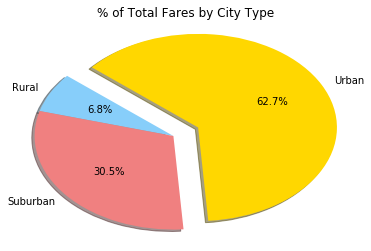

In [40]:
#Pie Chart for % of Total Fares by City Type

labels = city_type.index.values

sizes =city_type["% of Total Fares"]

colors = ['lightskyblue','lightcoral', 'gold']

explode = [0,0,.2]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.axis("tight")
plt.show()

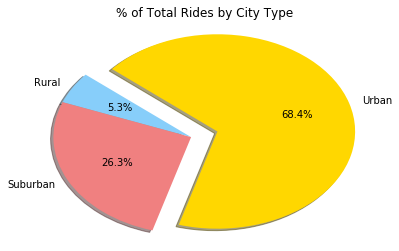

In [39]:
#Pie Chart for % of Total Rides by City Type

labels = city_type.index.values

sizes =city_type["% of Total Rides"]

colors = ['lightskyblue','lightcoral', 'gold']

explode = [0,0,0.2]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")
plt.axis("tight")
plt.show()

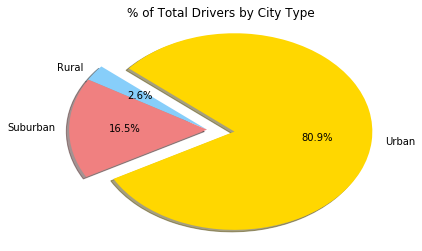

In [38]:
#Pie Chart for % of Total Drivers by City Type

labels = driver_count.index.values

sizes =driver_count["% of Drivers Count"]

colors = ['lightskyblue','lightcoral', 'gold']

explode = [0,0,0.2]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")
plt.axis("tight")
plt.show()